# Distribution Analysis


In [56]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"


In [57]:
FINAL_DF_PATH = "data/final_df_eg_with_results.csv"

## Setup


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import minmax_scale


In [59]:
final_df_eg_dist = pd.read_csv(FINAL_DF_PATH)
final_df_eg_dist["original_tweets_ids"] = final_df_eg_dist["original_tweets_ids"].apply(
    eval
)
final_df_eg_dist["support"] = final_df_eg_dist["support"].fillna(0)
final_df_eg_dist["neutral"] = final_df_eg_dist["neutral"].fillna(0)
final_df_eg_dist["against"] = final_df_eg_dist["against"].fillna(0)
final_df_eg_dist.head()


,author,dist,is_connected_to_centroid,centrality,weighted_centrality,rt_count,community,original_tweets_count,original_tweets_ids,avg_retweet_by_tweet,followers_count,statuses_count,verified,unique_rt_users,support,neutral,against,evaluated,total_eval
0,abodajana01,10,0,0.000626,1.004504e-04,1,trump,1,[1327430158438051840],1.000000,80,191,False,1,0.0,0.0,0.0,False,0
1,vstar2020,10,0,0.001150,2.372683e-04,4,trump,1,[1329520098806263812],4.000000,359,15213,False,2,0.0,0.0,0.0,False,0
2,PISDI94_96,10,0,0.018993,3.853663e-03,82,trump,30,"[1329404420174589953, 1324111047259729920, 132...",2.733333,68972,9260,False,77,0.0,0.0,0.0,False,0
3,ntvblkbutterfly,10,0,0.000048,3.400522e-07,1,trump,1,[1328830005388980225],1.000000,1898,10389,False,1,0.0,0.0,0.0,False,0
4,ramori99,10,0,0.000980,1.190429e-04,2,trump,1,[1324057065485033472],2.000000,0,81,False,2,0.0,0.0,0.0,False,0


In [62]:
final_df_evaluated = final_df_eg_dist[final_df_eg_dist["evaluated"] == True].copy()
# final_df_evaluated["truth_score"] = 2 * final_df_evaluated["support"] + 1 * final_df_evaluated["neutral"]
final_df_evaluated["truth_score"] = (
    3 * final_df_evaluated["support"]
    + 2 * final_df_evaluated["neutral"]
    + final_df_evaluated["against"]
)
final_df_evaluated["truth_score"] = minmax_scale(
    final_df_evaluated["truth_score"], feature_range=(0, 1)
)
print(len(final_df_evaluated))
final_df_evaluated.head()


5992


,author,dist,is_connected_to_centroid,centrality,weighted_centrality,rt_count,community,original_tweets_count,original_tweets_ids,avg_retweet_by_tweet,followers_count,statuses_count,verified,unique_rt_users,support,neutral,against,evaluated,total_eval,truth_score
5,GeraldCraig2,10,0,0.001674,0.000257,2,trump,2,"[1326152690196418563, 1329821253864218629]",1.0,21621,29232,False,2,0.500000,0.500000,0.0,True,2,0.750000
19,boostmyfuel,10,0,0.000319,0.000008,4,trump,2,"[1325393512448352256, 1326279608648536066]",2.0,14073,15698,False,4,0.500000,0.500000,0.0,True,2,0.750000
27,RedSkyRising20,10,0,0.003595,0.000414,12,trump,8,"[1323757367276773376, 1329244714818826248, 132...",1.5,15342,2764,False,9,0.666667,0.333333,0.0,True,3,0.833333
29,CrystalCarterL,10,0,0.001282,0.000128,2,trump,2,"[1328703780343451656, 1326910275283546121]",1.0,81,268,False,2,1.000000,0.000000,0.0,True,2,1.000000
36,JosephJFlynn1,10,0,0.028101,0.008118,189,trump,5,"[1330711106529222662, 1324724689827205121, 133...",37.8,275365,4239,False,132,0.666667,0.333333,0.0,True,3,0.833333


In [63]:
final_df_trump_evaluated = final_df_evaluated[
    final_df_evaluated["community"] == "trump"
]
final_df_biden_evaluated = final_df_evaluated[
    final_df_evaluated["community"] == "biden"
]
print(len(final_df_trump_evaluated))
print(len(final_df_biden_evaluated))


2997
2995


## Basic


### Basic analysis


In [64]:
final_df_trump_evaluated[["support", "against", "neutral", "truth_score"]].describe()
final_df_biden_evaluated[["support", "against", "neutral", "truth_score"]].describe()


,support,against,neutral,truth_score
count,2997.000000,2997.000000,2997.000000,2997.000000
mean,0.580558,0.013274,0.406167,0.783642
std,0.372099,0.081952,0.368908,0.196376
min,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000,0.666667
50%,0.500000,0.000000,0.500000,0.750000
75%,1.000000,0.000000,0.666667,1.000000
max,1.000000,1.000000,1.000000,1.000000


,support,against,neutral,truth_score
count,2995.000000,2995.000000,2995.000000,2995.000000
mean,0.048314,0.311981,0.639705,0.368166
std,0.159014,0.342456,0.354509,0.199654
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.500000,0.250000
50%,0.000000,0.250000,0.666667,0.400000
75%,0.000000,0.500000,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000


### Basic distribution


In [17]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
def targets_dist(dfparam):
    df_results_distribution = pd.melt(
        dfparam[["support", "neutral", "against"]], var_name="class"
    )
    display(df_results_distribution.groupby("class").describe())
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 5)
    sns.boxplot(x="value", y="class", data=df_results_distribution)
    plt.show()


value                                                       
          count      mean       std  min       25%  50%       75%  max
class                                                                 
against  2997.0  0.013274  0.081952  0.0  0.000000  0.0  0.000000  1.0
neutral  2997.0  0.406167  0.368908  0.0  0.000000  0.5  0.666667  1.0
support  2997.0  0.580558  0.372099  0.0  0.333333  0.5  1.000000  1.0

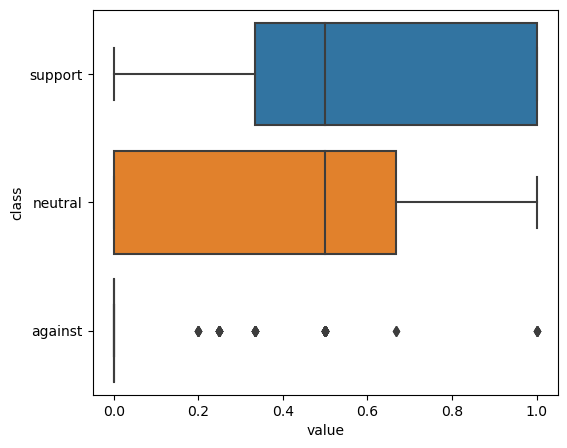

In [19]:
targets_dist(final_df_trump_evaluated)

value                                                  
          count      mean       std  min  25%       50%  75%  max
class                                                            
against  2995.0  0.311981  0.342456  0.0  0.0  0.250000  0.5  1.0
neutral  2995.0  0.639705  0.354509  0.0  0.5  0.666667  1.0  1.0
support  2995.0  0.048314  0.159014  0.0  0.0  0.000000  0.0  1.0

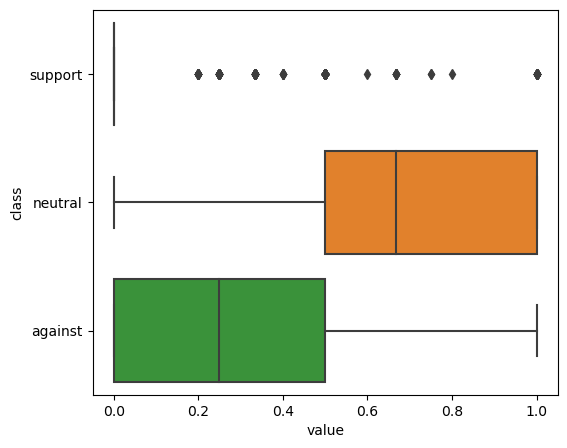

In [20]:
targets_dist(final_df_biden_evaluated)

## Percentiles


### Utils


In [65]:
import pandas as pd


def divide_dataframe_percentailes(df, percentiles, column):
    # Check if the column exists in the DataFrame
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame.")

    # Compute percentiles
    column_percentiles = df[column].quantile(percentiles).tolist()
    column_percentiles.sort()

    min_value = df[column].min()
    max_value = df[column].max()

    percentiles = [min_value] + column_percentiles + [max_value]

    # Create a list to store divided DataFrames
    divided_dfs = []

    # Divide DataFrame based on percentiles
    for i in range(len(percentiles) - 1):
        lower_percentile = percentiles[i]
        upper_percentile = percentiles[i + 1]

        print(lower_percentile, upper_percentile)

        # Filter DataFrame based on the specified percentile range
        subset_df = df[
            (df[column] >= lower_percentile) & (df[column] <= upper_percentile)
        ]

        # Append the subset DataFrame to the list
        divided_dfs.append(subset_df)

    return divided_dfs


In [66]:
def create_percentile_rank_df(
    param_df,
    percentiles,
    target_col="weighted_centrality",
    columns=["support", "neutral", "against"],
):
    percentiles_d100 = list(map(lambda x: x / 100, percentiles))[
        1 : len(percentiles) - 1
    ]
    dfs = divide_dataframe_percentailes(param_df, percentiles_d100, target_col)
    dfs_len = len(dfs)
    ranks = [f"Rank_{i}" for i in range(1, dfs_len + 1)]

    new_dfs = []
    for i, df in enumerate(dfs):
        new_df = df[columns].copy()
        new_df["rank"] = [ranks[i]] * len(df)
        new_dfs.append(new_df)

    return pd.concat(new_dfs, axis=0)


def create_percentile_rank_count_df(
    param_df, percentiles, target_col="weighted_centrality"
):
    param_df = param_df.copy()
    param_df["support"] = param_df["support"] * param_df["total_eval"]
    param_df["neutral"] = param_df["neutral"] * param_df["total_eval"]
    param_df["against"] = param_df["against"] * param_df["total_eval"]

    percentiles_d100 = list(map(lambda x: x / 100, percentiles))[
        1 : len(percentiles) - 1
    ]
    dfs = divide_dataframe_percentailes(param_df, percentiles_d100, target_col)
    dfs_len = len(dfs)
    ranks = [f"Rank_{i}" for i in range(1, dfs_len + 1)]

    new_dfs = []
    for i, df in enumerate(dfs):
        new_df = df[["support", "neutral", "against"]].copy()
        new_df["rank"] = [ranks[i]] * len(df)
        new_dfs.append(new_df)

    return pd.concat(new_dfs, axis=0)

In [67]:
def group_pers_stats(dfparam, percentiles, pc="weighted_centrality"):
    print("count")
    df1 = dfparam.groupby(
        pd.cut(
            dfparam[pc], np.percentile(dfparam[pc], percentiles), include_lowest=True
        )
    ).count()
    display(df1)
    print("sum")
    df2 = dfparam.groupby(
        pd.cut(
            dfparam[pc], np.percentile(dfparam[pc], percentiles), include_lowest=True
        )
    ).sum(numeric_only=True)
    display(df2)
    print("mean")
    df3 = dfparam.groupby(
        pd.cut(
            dfparam[pc], np.percentile(dfparam[pc], percentiles), include_lowest=True
        )
    ).mean(numeric_only=True)
    display(df3)

### Percentiles trump weighted_centrality

IRC, the whiskers extend to the the lowest (highest) data point still within 1.5 IQR of the lower (upper) quartile. So depending on where the data points actually are, the whiskers on both sides won't necessarily be of the same length.


In [34]:
pers = [0, 25, 50, 75, 100]
pers_column = "weighted_centrality"


In [35]:
group_pers_stats(final_df_trump_evaluated, pers)

count


,author,dist,is_connected_to_centroid,centrality,weighted_centrality,rt_count,community,original_tweets_count,original_tweets_ids,avg_retweet_by_tweet,followers_count,statuses_count,verified,unique_rt_users,support,neutral,against,evaluated,total_eval,truth_score
weighted_centrality,,,,,,,,,,,,,,,,,,,,
"(-0.00099999359, 9.74e-05]",750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750
"(9.74e-05, 0.000156]",749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749
"(0.000156, 0.000657]",749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749
"(0.000657, 0.653]",749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749


sum


,dist,is_connected_to_centroid,centrality,weighted_centrality,rt_count,original_tweets_count,avg_retweet_by_tweet,followers_count,statuses_count,verified,unique_rt_users,support,neutral,against,evaluated,total_eval,truth_score
weighted_centrality,,,,,,,,,,,,,,,,,
"(-0.00099999359, 9.74e-05]",5643,217,0.353023,0.024358,2472,1880,979.863165,29265028,41611405,49,2279,390.200000,343.050000,16.750000,750,1639,561.725000
"(9.74e-05, 0.000156]",5054,286,0.818838,0.089875,2485,1939,944.622330,15002812,44565699,39,2278,440.600000,296.950000,11.450000,749,1639,589.075000
"(0.000156, 0.000657]",5046,286,1.750870,0.242039,4558,2891,1251.274623,25792457,57295452,56,4268,460.733333,283.350000,4.916667,749,1935,602.408333
"(0.000657, 0.653]",5041,289,14.552908,6.169816,237211,14918,7312.814549,271724653,61689453,202,187764,448.400000,293.933333,6.666667,749,2479,595.366667


mean


,dist,is_connected_to_centroid,centrality,weighted_centrality,rt_count,original_tweets_count,avg_retweet_by_tweet,followers_count,statuses_count,verified,unique_rt_users,support,neutral,against,evaluated,total_eval,truth_score
weighted_centrality,,,,,,,,,,,,,,,,,
"(-0.00099999359, 9.74e-05]",7.524000,0.289333,0.000471,0.000032,3.296000,2.506667,1.306484,39020.037333,55481.873333,0.065333,3.038667,0.520267,0.457400,0.022333,1.0,2.185333,0.748967
"(9.74e-05, 0.000156]",6.747664,0.381842,0.001093,0.000120,3.317757,2.588785,1.261178,20030.456609,59500.265688,0.052069,3.041389,0.588251,0.396462,0.015287,1.0,2.188251,0.786482
"(0.000156, 0.000657]",6.736983,0.381842,0.002338,0.000323,6.085447,3.859813,1.670594,34435.857143,76495.930574,0.074766,5.698264,0.615131,0.378304,0.006564,1.0,2.583445,0.804283
"(0.000657, 0.653]",6.730307,0.385848,0.019430,0.008237,316.703605,19.917223,9.763437,362783.248331,82362.420561,0.269693,250.686248,0.598665,0.392434,0.008901,1.0,3.309746,0.794882


6.4082786744985905e-09 9.740774560108577e-05
9.740774560108577e-05 0.0001555516250112
0.0001555516250112 0.0006573456966523
0.0006573456966523 0.6525476724328405


,support,neutral,against,rank
19,0.500000,0.500000,0.000000,Rank_1
75,0.000000,1.000000,0.000000,Rank_1
102,0.500000,0.500000,0.000000,Rank_1
144,0.500000,0.500000,0.000000,Rank_1
213,0.333333,0.333333,0.333333,Rank_1


<Axes: xlabel='support', ylabel='rank'>

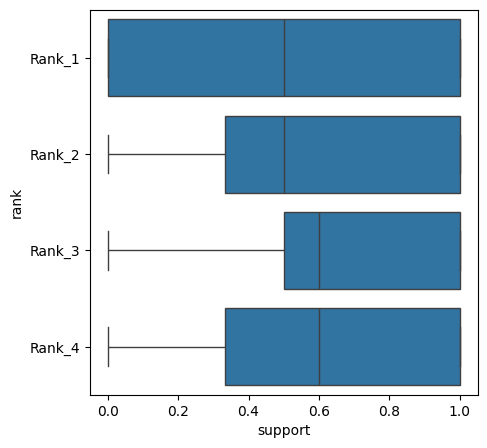

In [ ]:
rank_trump_df = create_percentile_rank_df(
    final_df_trump_evaluated, pers, target_col="weighted_centrality"
)
rank_trump_df.head()
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.boxplot(
    x="support",
    y="rank",
    data=rank_trump_df,
    ax=ax,
)
plt.show()

In [ ]:
rank_trump_df.groupby("rank")["support"].describe()[["25%", "50%", "75%"]]

,25%,50%,75%
rank,,,
Rank_1,0.000000,0.5,1.0
Rank_2,0.333333,0.5,1.0
Rank_3,0.500000,0.6,1.0
Rank_4,0.333333,0.6,1.0


### Percentiles biden weighted_centrality


In [36]:
pers = [0, 25, 50, 75, 100]
pers_column = "weighted_centrality"


In [37]:
group_pers_stats(final_df_biden_evaluated, pers)

count


,author,dist,is_connected_to_centroid,centrality,weighted_centrality,rt_count,community,original_tweets_count,original_tweets_ids,avg_retweet_by_tweet,followers_count,statuses_count,verified,unique_rt_users,support,neutral,against,evaluated,total_eval,truth_score
weighted_centrality,,,,,,,,,,,,,,,,,,,,
"(-0.00099999999874, 3.15e-05]",749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749
"(3.15e-05, 0.00025]",749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749
"(0.00025, 0.000732]",748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748
"(0.000732, 0.574]",749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749


sum


,dist,is_connected_to_centroid,centrality,weighted_centrality,rt_count,original_tweets_count,avg_retweet_by_tweet,followers_count,statuses_count,verified,unique_rt_users,support,neutral,against,evaluated,total_eval,truth_score
weighted_centrality,,,,,,,,,,,,,,,,,
"(-0.00099999999874, 3.15e-05]",7253,30,0.208581,0.005316,4424,2177,1480.374024,202282669,48504572,215,4228,45.150000,501.100000,202.750000,749,1743,295.700000
"(3.15e-05, 0.00025]",7066,52,1.194998,0.094874,5265,2493,1642.260270,223546131,49343302,190,4999,38.550000,477.883333,232.566667,749,1798,277.491667
"(0.00025, 0.000732]",6891,72,2.758750,0.315402,7896,3074,2080.546866,297500097,52105865,240,7508,30.066667,481.400000,236.533333,748,1901,270.766667
"(0.000732, 0.574]",7045,55,15.831705,6.392139,147838,15276,8518.762305,923489760,52457838,410,135403,30.933333,455.533333,262.533333,749,2354,258.700000


mean


,dist,is_connected_to_centroid,centrality,weighted_centrality,rt_count,original_tweets_count,avg_retweet_by_tweet,followers_count,statuses_count,verified,unique_rt_users,support,neutral,against,evaluated,total_eval,truth_score
weighted_centrality,,,,,,,,,,,,,,,,,
"(-0.00099999999874, 3.15e-05]",9.683578,0.040053,0.000278,0.000007,5.906542,2.906542,1.976467,2.700703e+05,64759.108144,0.287049,5.644860,0.060280,0.669025,0.270694,1.0,2.327103,0.394793
"(3.15e-05, 0.00025]",9.433912,0.069426,0.001595,0.000127,7.029372,3.328438,2.192604,2.984595e+05,65878.907877,0.253672,6.674232,0.051469,0.638028,0.310503,1.0,2.400534,0.370483
"(0.00025, 0.000732]",9.212567,0.096257,0.003688,0.000422,10.556150,4.109626,2.781480,3.977274e+05,69660.247326,0.320856,10.037433,0.040196,0.643583,0.316221,1.0,2.541444,0.361988
"(0.000732, 0.574]",9.405874,0.073431,0.021137,0.008534,197.380507,20.395194,11.373514,1.232964e+06,70037.166889,0.547397,180.778371,0.041300,0.608189,0.350512,1.0,3.142857,0.345394


1.2613339253631982e-12 3.1477197627011324e-05
3.1477197627011324e-05 0.0002502965024835
0.0002502965024835 0.0007324713219369
0.0007324713219369 0.5741222360064812


,support,neutral,against,rank
19573,0.0,1.000000,0.000000,Rank_1
19576,0.0,1.000000,0.000000,Rank_1
19615,0.0,1.000000,0.000000,Rank_1
19646,0.0,0.666667,0.333333,Rank_1
19650,0.0,1.000000,0.000000,Rank_1


<Axes: xlabel='against', ylabel='rank'>

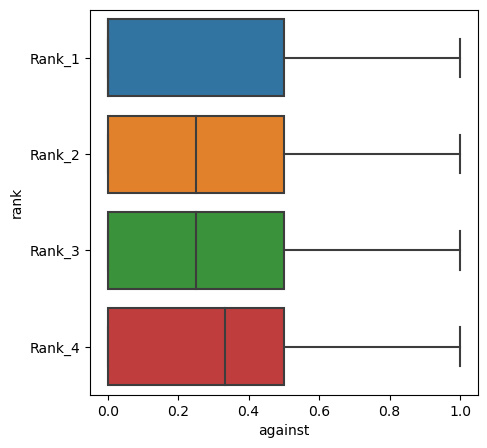

In [38]:
rank_biden_df = create_percentile_rank_df(
    final_df_biden_evaluated, pers, target_col="weighted_centrality"
)
rank_biden_df.head()
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.boxplot(
    x="against",
    y="rank",
    data=rank_biden_df,
    ax=ax,
)
plt.show()

In [39]:
rank_biden_df.groupby("rank")["against"].describe()[["25%", "50%", "75%"]]

,25%,50%,75%
rank,,,
Rank_1,0.0,0.000000,0.5
Rank_2,0.0,0.250000,0.5
Rank_3,0.0,0.250000,0.5
Rank_4,0.0,0.333333,0.5
